In [1]:
import os

import corner
import matplotlib.pyplot as plt
import numpy as np

from starcluster import CornerPlot, dpgmm
from starcluster.extract_data import EquatorialData

from corner import corner as crn
from figaro.mixture import DPGMM
from figaro.utils import get_priors
from pathlib import Path

n_alot = 30000

%autoreload 2

UsageError: Line magic function `%autoreload` not found.


# All sky

In [2]:
data_path = Path(os.getcwd()).joinpath('data/all-sky-test.csv')
outpath = Path(os.getcwd()).joinpath('data/all-sky-test.txt')

# data from SIMBAD
expected = None

plot_title = data_path.parts[-1]
plot_title = plot_title.strip('.csv')

In [3]:
dataset = EquatorialData(path=data_path, convert=True)
#samples = dataset.export_random_subset(30000, mag='g_mag', c_index='bp_rp')

In [4]:
dataset.save_dataset(outpath=outpath)

l = dataset('l')
b = dataset('b')
plx = dataset('plx')
pml = dataset('pml_star')
pmb = dataset('pmb')
v_rad = dataset('v_rad')
mag_ds = dataset('g_mag')
c_index_ds = dataset('bp_rp')

epsilon = 0

bounds = [[l.min() - epsilon, l.max() + epsilon],
          [b.min() - epsilon, b.max() + epsilon],
          [plx.min() - epsilon, plx.max() + epsilon],
          [pml.min() - epsilon, pml.max() + epsilon],
          [pmb.min() - epsilon, pmb.max() + epsilon],
          [v_rad.min() - epsilon, v_rad.max() + epsilon],
          [mag_ds.min() - epsilon, mag_ds.max() + epsilon],
          [c_index_ds.min() - epsilon, c_index_ds.max() + epsilon]]

samples = dataset.as_array(mag='g_mag', c_index='bp_rp')

In [5]:
samples = samples[samples[:, 0] != l.min()]
samples = samples[samples[:, 0] != l.max()]

samples = samples[samples[:, 1] != b.min()]
samples = samples[samples[:, 1] != b.max()]

samples = samples[samples[:, 2] != plx.min()]
samples = samples[samples[:, 2] != plx.max()]

samples = samples[samples[:, 3] != pml.min()]
samples = samples[samples[:, 3] != pml.max()]

samples = samples[samples[:, 4] != pmb.min()]
samples = samples[samples[:, 4] != pmb.max()]

samples = samples[samples[:, 5] != v_rad.min()]
samples = samples[samples[:, 5] != v_rad.max()]

samples = samples[samples[:, 6] != mag_ds.min()]
samples = samples[samples[:, 6] != mag_ds.max()]

samples = samples[samples[:, 7] != c_index_ds.min()]
samples = samples[samples[:, 7] != c_index_ds.max()]

In [6]:
prior = get_priors(bounds, samples)

mix = DPGMM(bounds=bounds,
            prior_pars=prior)

density = mix.density_from_samples(samples)

In [7]:
dataset.as_array(mag='g_mag', c_index='bp_rp').shape

(30000, 8)

In [8]:
N_stars = dataset.as_array(mag='g_mag', c_index='bp_rp').shape[0]

In [9]:
density.n_cl

6153

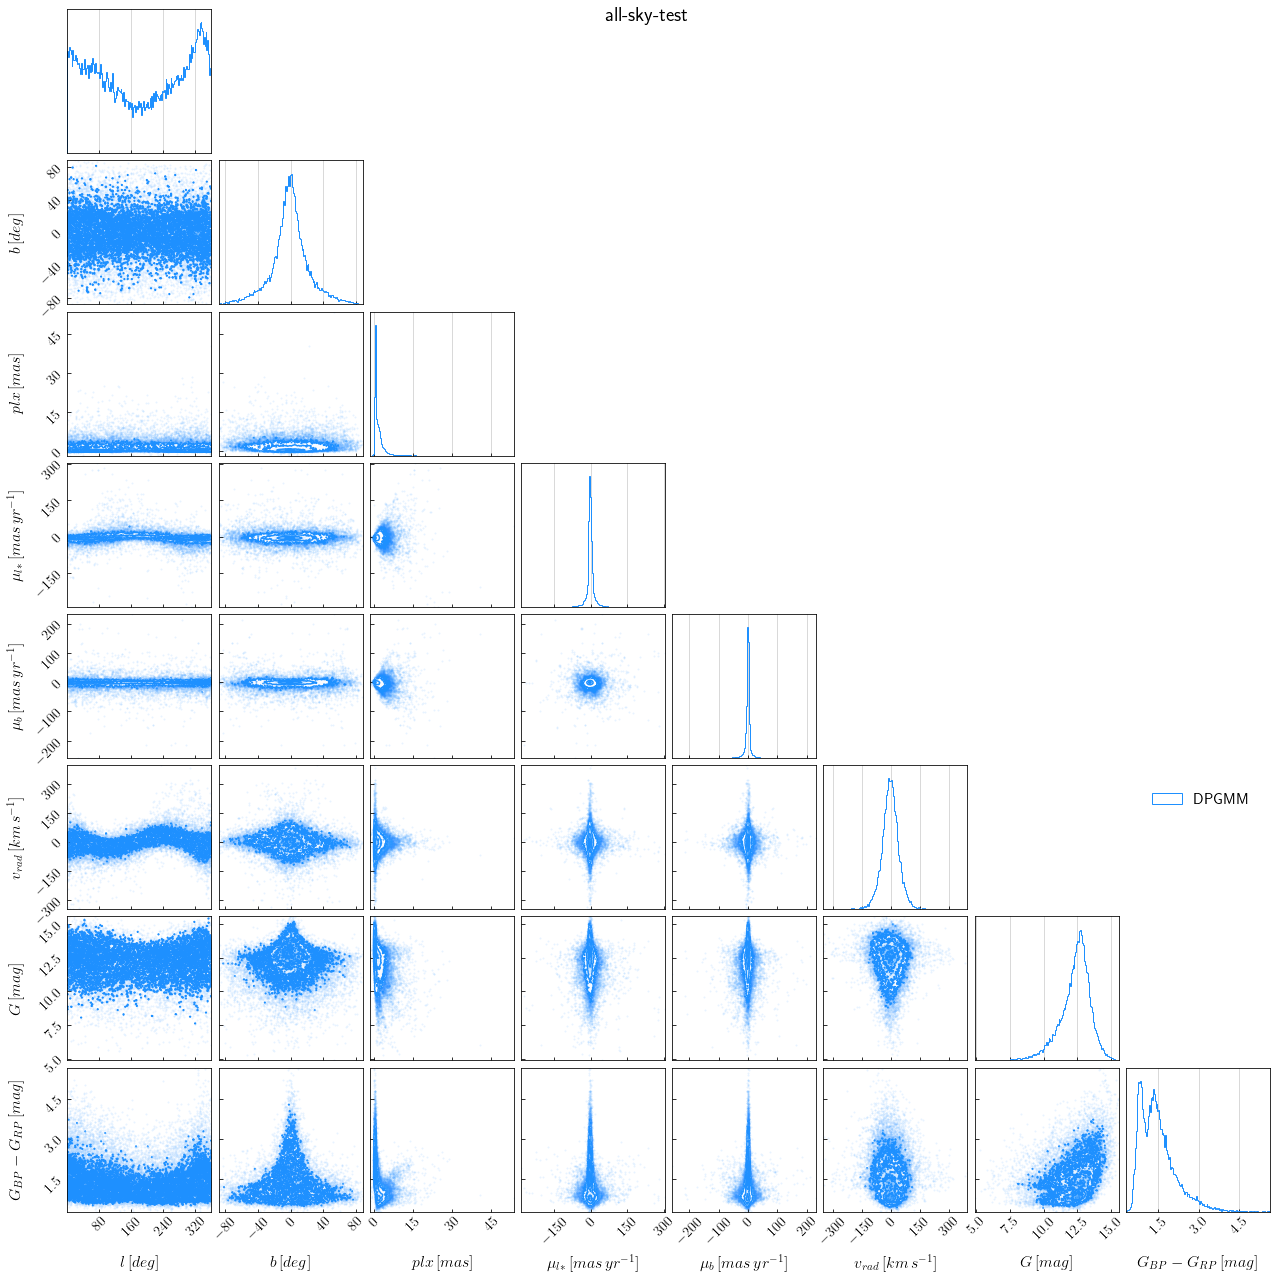

In [11]:
cp = CornerPlot(density=density,
                dataset=dataset,
                expected=expected)
fig = cp(n_alot, plot_title=plot_title)#, mag='g_mag', c_index='bp_rp')
plt.show()

In [12]:
fig.savefig(f'all-sky-test-kin+phot-{n_alot}.pdf', format='pdf')